In [1]:
# Import libraries and load data
import pandas as pd

data = pd.read_csv('./data/hotel_revenue_edited.csv')
print(data.shape)
data.head()

(141497, 28)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,previous_bookings_not_canceled,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,1,85,2018,July,27,1,0,3,2,...,0,0,No Deposit,240,0,Transient,82.0,0,1,Canceled
1,Resort Hotel,1,75,2018,July,27,1,0,3,2,...,0,0,No Deposit,15,0,Transient,105.5,0,0,Canceled
2,Resort Hotel,1,23,2018,July,27,1,0,4,2,...,0,0,No Deposit,240,0,Transient,123.0,0,0,Canceled
3,Resort Hotel,1,60,2018,July,27,1,2,5,2,...,0,0,No Deposit,240,0,Transient,107.0,0,2,Canceled
4,Resort Hotel,1,96,2018,July,27,1,2,8,2,...,0,0,No Deposit,No Agent,0,Transient,108.3,0,2,Canceled


# PyCaret

In [2]:
# Set up the experiment
from pycaret.classification import *
s = setup(data, target = 'is_canceled', train_size=0.2, session_id=42)

,Description,Value
0,Session id,42
1,Target,is_canceled
2,Target type,Binary
3,Original data shape,"(141497, 28)"
4,Transformed data shape,"(141497, 58)"
5,Transformed train set shape,"(28299, 58)"
6,Transformed test set shape,"(113198, 58)"
7,Ordinal features,1
8,Numeric features,17
9,Categorical features,10


In [3]:
# Based on the compare models() in the pipeline 1, create the model
lr = create_model('lr')
t_lr = tune_model(lr)
f_lr = finalize_model(t_lr)
f_lr

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9979,0.9989,0.9943,1.0000,0.9971,0.9955,0.9955
3,0.9993,1.0000,0.9981,1.0000,0.9991,0.9985,0.9985
4,0.9996,1.0000,0.9991,1.0000,0.9995,0.9992,0.9992
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9996,1.0000,0.9991,1.0000,0.9995,0.9992,0.9992
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9989,1.0000,0.9972,1.0000,0.9986,0.9977,0.9977


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9979,0.9985,0.9943,1.0000,0.9971,0.9955,0.9955
3,0.9993,1.0000,0.9981,1.0000,0.9991,0.9985,0.9985
4,0.9996,1.0000,0.9991,1.0000,0.9995,0.9992,0.9992
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9996,1.0000,0.9991,1.0000,0.9995,0.9992,0.9992
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9989,1.0000,0.9972,1.0000,0.9986,0.9977,0.9977


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


Pipeline(memory=FastMemory(location=C:\Users\biauser\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['lead_time', 'arrival_date_year',
                                             'arrival_date_week_number',
                                             'arrival_date_day_of_month',
                                             'stays_in_weekend_nights',
                                             'stays_in_week_nights', 'adults',
                                             'children', 'babies',
                                             'is_repeated_guest',
                                             'previous_cancel...
                                                                   handle_missing='return_nan',
                                                                   handle_unknown='value',
                                                                   random_state=42,
                                                                   return_df=True,
                                                                   sigma=None,
                                                                   verbose=0))),
                ('actual_estimator',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=1000,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=42,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

# scikit-learn and Yellowbrick

In [4]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'deposit_type',
       'agent', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status'],
      dtype='object')

In [5]:
label = ['agent','total_of_special_requests','required_car_parking_spaces','booking_changes',
         'is_repeated_guest','stays_in_weekend_nights','stays_in_week_nights','adults','children','babies']
data.drop(labels=label, axis=1, inplace=True)
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,meal,country,market_segment,distribution_channel,previous_cancellations,previous_bookings_not_canceled,deposit_type,days_in_waiting_list,customer_type,adr,reservation_status
0,Resort Hotel,1,85,2018,July,27,1,BB,PRT,Online TA,TA/TO,0,0,No Deposit,0,Transient,82.0,Canceled
1,Resort Hotel,1,75,2018,July,27,1,HB,PRT,Offline TA/TO,TA/TO,0,0,No Deposit,0,Transient,105.5,Canceled
2,Resort Hotel,1,23,2018,July,27,1,BB,PRT,Online TA,TA/TO,0,0,No Deposit,0,Transient,123.0,Canceled
3,Resort Hotel,1,60,2018,July,27,1,BB,PRT,Online TA,TA/TO,0,0,No Deposit,0,Transient,107.0,Canceled
4,Resort Hotel,1,96,2018,July,27,1,BB,PRT,Direct,Direct,0,0,No Deposit,0,Transient,108.3,Canceled


In [6]:
X = data.drop(['is_canceled'], axis=1) 
y = data['is_canceled']

In [7]:
X = pd.get_dummies(X, drop_first=True)

In [8]:
# Split data into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [9]:
from sklearn.metrics import f1_score, accuracy_score, precision_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression

models = [
    LogisticRegression(max_iter=1000)
]


def score_model(X, y, estimator, **kwargs):
    """
    Test various estimators.
    """
    y = LabelEncoder().fit_transform(y)
    model = Pipeline([
        ('one_hot_encoder', OneHotEncoder()),
        ('estimator', estimator)
    ])

    # Instantiate the classification model and visualizer
    model.fit(X, y, **kwargs)

    expected  = y
    predicted = model.predict(X)

    # Compute and return F1 (harmonic mean of precision and recall)
    print(f"{estimator.__class__.__name__}:\nAccuracy:{accuracy_score(expected, predicted)*100:.3f}%\n"
          f"Precision: {precision_score(expected, predicted, average='weighted', zero_division=True)*100:.3f}%\n"
          f"F1: {f1_score(expected, predicted, average='weighted')*100:.3f}%\n")

    
for model in models:
    score_model(X, y, model)

LogisticRegression:
Accuracy:99.980%
Precision: 99.980%
F1: 99.980%



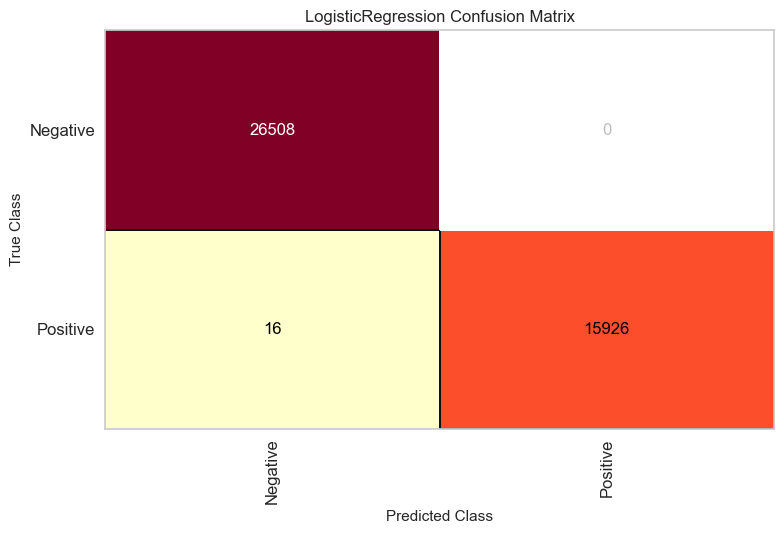

ConfusionMatrix(ax=<AxesSubplot: title={'center': 'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>,
                classes=['Negative', 'Positive'],
                cmap=<matplotlib.colors.ListedColormap object at 0x0000019242431910>,
                encoder=None,
                estimator=LogisticRegression(C=1.0, class_weight=None,
                                             dual=False, fit_intercept=True,
                                             intercept_scaling=1, l1_ratio=None,
                                             max_iter=1000, multi_class='auto',
                                             n_jobs=None, penalty='l2',
                                             random_state=None, solver='lbfgs',
                                             tol=0.0001, verbose=0,
                                             warm_start=False),
                fontsize=None, force_model=False, is_fitted='auto',
                percent=False, sample_weight=None)

In [11]:
from yellowbrick.classifier import confusion_matrix
import matplotlib.pyplot as plt

y_train_tx = LabelEncoder().fit_transform(y_train)
y_test_tx = LabelEncoder().fit_transform(y_test)

confusion_matrix(
      LogisticRegression(max_iter=1000),
      X_train, y_train_tx, X_test, y_test_tx,classes=['Negative', 'Positive'])